# 陣列運算

上一堂課的回測，大家是否都注意到雖然我們的結果是正確的，程式執行的時間卻很慢呢？

針對不同量級的資料，我們需要用不同的做法去解決問題，資料越大，我們就需要用聰明的方法做事

要加快程式的做法有很多種，像是用時間複雜度較好的演算法

但是演算法在實作上**十分困難**，而且若處理的資料量太小，很難看出時間上的差異

另一種做法是懂得利用資料結構，像是**陣列**(或者以 Python 的説法：List)

In [2]:
import xlwings as xw
import time

In [3]:
# 以我們上一堂課的 Excel 檔案爲例，打開你的 tsmc_back_test.xlsx 檔案
wb = xw.Book(r'C:\Users\user\Desktop\L3\tsmc_back_test.xlsx')
wb

<Book [tsmc_back_test.xlsx]>

In [8]:
tsmc_sheet = wb.sheets['2330']

result_sheet = wb.sheets['result']

In [9]:
# 我們可以算出所有的日報酬率
from xlwings.constants import Direction

num_of_rows = tsmc_sheet.range('B1').end(Direction.xlDown).row
num_of_rows

# 記錄時間，time.time() 就像是按碼錶，把執行到它的那一刻的時間記錄下來
ts = time.time()

for i in range(3, num_of_rows+1):
    daily_return = (result_sheet.cells(i, 2).value - result_sheet.cells(i-1, 2).value) / result_sheet.cells(i-1, 2).value
    result_sheet.cells(i, 3).value = daily_return

# 把回圈的跑完的時間記錄下來
td = time.time()
td - ts

1.2350001335144043

# 其實這個速度很慢...
- 原因是讀寫 Excel 試算表内的資料是很費時的
- 若想加速，需要**減少讀寫 Excel 資料的次數**
- 一個簡單的原則：**當程式碼出現一次 .value, 我們的程式就會需要讀寫一次 Excel
- 所以目前的程式碼是讀寫 4 x N 次

# 這時我們就可以使用 Python 的 List (清單) 來解決執行效能的問題

- List (清單) 其實就是一般程式語言的 Array (陣列) 只是用了不同的名字 
- 可以一次性的截取出所有的收盤價，存入 list，這樣當 Python 在進行運算時
- 可以到陣列讀取值，而非到 Excel 試算表讀取 Excel 的資料

## list (清單)

arr = [224.5, 224.5, 233.0, 237.5, 237.5, 238.0]

| arr   |  224.5 |224.5  | 233.0   | 237.5   | 237.5   | 238.0 |
| ------ | --- | --- | --- | --- | --- | --- |
| 索引值 | 0   | 1   | 2   | 3   | 4   | 5   |

```python
arr[0]
# 會回傳 224.5
arr[5]
# 會回傳 237.5
```

---
## .append()

把資料加到清單的最後面：

```
ary = [1,2,3]
ary.append(4)
```
最後產生的 list 就會是：
```python
[1, 2, 3, 4]
```

---

## slicing (切片)

Slicing 就是取出一個陣列部分裏面的單個或多個值

實作方法是，**ary[起始的索引值 : 結束的索引值+1]**

```python
ary[0:3]
```
0 代表起始的索引值、3代表結束的索引值的後面一個值

最後就會得到 
```python
[1,2,3]
```

In [10]:
ary = [1, 2, 3, 4]
print(ary[0])
ary.append(5)
print(ary)
ary[0:3]

1
[1, 2, 3, 4, 5]


[1, 2, 3]

In [11]:
# expand='down' 表示會自動從 B2 開始，往下搜尋到最後一個有值的儲存格，以陣列的形式回傳
tsmc_price = tsmc_sheet.range('B2').options(expand='down').value
tsmc_price

[224.5,
 224.5,
 233.0,
 237.5,
 237.5,
 238.0,
 235.5,
 237.5,
 239.0,
 237.5,
 239.0,
 238.0,
 238.0,
 236.0,
 239.0,
 243.0,
 243.0,
 242.5,
 241.0,
 239.0,
 239.5,
 244.0,
 242.5,
 241.0,
 240.5,
 239.5,
 240.0,
 237.5,
 238.0,
 241.5,
 238.5,
 243.0,
 242.0,
 242.5,
 244.0,
 237.0,
 234.0,
 234.5,
 226.0,
 231.0,
 234.0,
 232.5,
 227.0,
 226.5,
 227.0,
 231.0,
 231.0,
 227.5,
 227.5,
 227.5,
 227.5,
 227.5,
 230.5,
 224.5,
 225.0,
 225.0,
 227.5,
 228.5,
 226.0,
 225.0,
 226.0,
 229.5,
 232.5,
 239.5,
 240.0,
 242.0,
 242.0,
 236.5,
 235.0,
 237.0,
 240.0,
 240.5,
 242.0,
 248.5,
 255.5,
 261.5,
 266.0,
 258.0,
 258.0,
 255.0,
 258.5,
 253.0,
 255.0,
 259.5,
 259.5,
 253.0,
 239.0,
 240.0,
 238.5,
 232.5,
 236.5,
 242.5,
 239.5,
 245.0,
 246.5,
 246.0,
 243.0,
 240.0,
 241.5,
 250.0,
 247.0,
 249.5,
 250.5,
 254.0,
 259.0,
 257.0,
 255.0,
 255.0,
 255.0,
 253.0,
 252.0,
 251.0,
 245.0,
 243.5,
 251.0,
 245.0,
 244.0,
 246.0,
 247.0,
 246.0,
 244.0,
 245.0,
 245.5,
 248.0,
 245.0,


In [12]:
tsmc_sheet.range('B2:B193').value

[224.5,
 224.5,
 233.0,
 237.5,
 237.5,
 238.0,
 235.5,
 237.5,
 239.0,
 237.5,
 239.0,
 238.0,
 238.0,
 236.0,
 239.0,
 243.0,
 243.0,
 242.5,
 241.0,
 239.0,
 239.5,
 244.0,
 242.5,
 241.0,
 240.5,
 239.5,
 240.0,
 237.5,
 238.0,
 241.5,
 238.5,
 243.0,
 242.0,
 242.5,
 244.0,
 237.0,
 234.0,
 234.5,
 226.0,
 231.0,
 234.0,
 232.5,
 227.0,
 226.5,
 227.0,
 231.0,
 231.0,
 227.5,
 227.5,
 227.5,
 227.5,
 227.5,
 230.5,
 224.5,
 225.0,
 225.0,
 227.5,
 228.5,
 226.0,
 225.0,
 226.0,
 229.5,
 232.5,
 239.5,
 240.0,
 242.0,
 242.0,
 236.5,
 235.0,
 237.0,
 240.0,
 240.5,
 242.0,
 248.5,
 255.5,
 261.5,
 266.0,
 258.0,
 258.0,
 255.0,
 258.5,
 253.0,
 255.0,
 259.5,
 259.5,
 253.0,
 239.0,
 240.0,
 238.5,
 232.5,
 236.5,
 242.5,
 239.5,
 245.0,
 246.5,
 246.0,
 243.0,
 240.0,
 241.5,
 250.0,
 247.0,
 249.5,
 250.5,
 254.0,
 259.0,
 257.0,
 255.0,
 255.0,
 255.0,
 253.0,
 252.0,
 251.0,
 245.0,
 243.5,
 251.0,
 245.0,
 244.0,
 246.0,
 247.0,
 246.0,
 244.0,
 245.0,
 245.5,
 248.0,
 245.0,


In [13]:
result_sheet.range("F2:F5").value = [[],[],[]]

AssertionError: 

In [14]:
# 先宣告一個空陣列
return_values = []

# 從第二筆資料(索引值為1)開始
for i in range(1, len(tsmc_price)):
    # 取得當天的收盤價
    today_price = tsmc_price[i]
    # 取得前一天的收盤價
    yesterday_price = tsmc_price[i-1]
    # 算出報酬率
    return_value = (today_price - yesterday_price) / yesterday_price
    # 將報酬率存入陣列用append
    return_values.append(return_value)
    
return_values

[0.0,
 0.0378619153674833,
 0.019313304721030045,
 0.0,
 0.002105263157894737,
 -0.01050420168067227,
 0.008492569002123142,
 0.00631578947368421,
 -0.006276150627615063,
 0.00631578947368421,
 -0.0041841004184100415,
 0.0,
 -0.008403361344537815,
 0.012711864406779662,
 0.016736401673640166,
 0.0,
 -0.00205761316872428,
 -0.006185567010309278,
 -0.008298755186721992,
 0.0020920502092050207,
 0.018789144050104383,
 -0.006147540983606557,
 -0.006185567010309278,
 -0.002074688796680498,
 -0.004158004158004158,
 0.0020876826722338203,
 -0.010416666666666666,
 0.002105263157894737,
 0.014705882352941176,
 -0.012422360248447204,
 0.018867924528301886,
 -0.00411522633744856,
 0.002066115702479339,
 0.006185567010309278,
 -0.028688524590163935,
 -0.012658227848101266,
 0.002136752136752137,
 -0.03624733475479744,
 0.022123893805309734,
 0.012987012987012988,
 -0.00641025641025641,
 -0.023655913978494623,
 -0.0022026431718061676,
 0.002207505518763797,
 0.01762114537444934,
 0.0,
 -0.015151515

In [ ]:
# 接下來我們就可以歡天喜地的把陣列賦值給 C3 到 C114 這個範圍了

result_sheet.range("C3").value = return_values

# 但是結果有點出乎我們的意料...

![](https://www.dropbox.com/s/tgsno7c6d6jiyaq/range_wrong.PNG?dl=1)

- 原因是陣列是以 row-based，但是我們想要賦值的範圍是 column-based

若你執行以下程式碼：
```python
result_sheet.range("A1:B2").value
```
就會回傳
```python
[['日期', '收盤價'], [datetime.datetime(2017, 10, 5, 0, 0), 224.5]]
```
在 Excel 的世界，任何一個二維 range 的值，就是用一個**二維陣列(也就是在陣列裏放另一個陣列)來表示**

- 而目前 return_values 這個陣列的大小是 1 x 111 
- 我們需要有一個方法把 return_values 的大小轉換成 111 x 1

In [ ]:
result_sheet.range("A1:B2").value

In [ ]:
# 我們需要把 sma 的每一個值分別放入一個 list，一個 list 代表一個 row 的值
# 這些代表 row 的 list 最後會被放入另一個 list, 成爲一個二維陣列
values2d = [[227.33333333],
            [231.66666667],
            [236.        ]]

result_sheet.range("C3").value = values2d

# 在這裏就和各位介紹 Numpy 

這時就介紹一下 Numpy，它是 Python 的一個重要模組，主要用於資料處理上。Numpy 底層以 C 和 Fortran 語言實作，所以能快速操作多重維度的陣列。

因爲 Numpy 這個殺手級模組的出現，讓 Python 語言在資料科學與科研的領域大受歡迎。

- 在這個範例我們就來看如何利用 **Numpy** 這個熱門的科學運算套件所提供的資料結構

In [5]:
# 引用 numpy
import numpy as np

## numpy.reshape()

改變一個陣列的維度

假設原本我們有一個 1 x 6 的陣列：

```python
[0, 1, 2, 3, 4, 5]
```

我們將該陣列轉成一個 **numpy** 的陣列

```python
np.array(ary)
```

array([0, 1, 2, 3, 4, 5])

再用 **reshape** 把它變成一個 3 x 2 的陣列

```python
np.array(ary).reshape(3,2)
```

最後的陣列就會變成：

```python
array([[0, 1],
       [2, 3],
       [4, 5]])
```

In [10]:
ary = [0, 1, 2, 3, 4, 5]
np.array(ary)

array([0, 1, 2, 3, 4, 5])

In [ ]:
np.array(ary).reshape(6,1)

In [6]:
# expand='down' 表示會自動從 B2 開始，往下搜尋到最後一個有值的儲存格，以陣列的形式回傳
tsmc_price = tsmc_sheet.range('B2').options(expand='down').value
tsmc_price

[224.5,
 224.5,
 233.0,
 237.5,
 237.5,
 238.0,
 235.5,
 237.5,
 239.0,
 237.5,
 239.0,
 238.0,
 238.0,
 236.0,
 239.0,
 243.0,
 243.0,
 242.5,
 241.0,
 239.0,
 239.5,
 244.0,
 242.5,
 241.0,
 240.5,
 239.5,
 240.0,
 237.5,
 238.0,
 241.5,
 238.5,
 243.0,
 242.0,
 242.5,
 244.0,
 237.0,
 234.0,
 234.5,
 226.0,
 231.0,
 234.0,
 232.5,
 227.0,
 226.5,
 227.0,
 231.0,
 231.0,
 227.5,
 227.5,
 227.5,
 227.5,
 227.5,
 230.5,
 224.5,
 225.0,
 225.0,
 227.5,
 228.5,
 226.0,
 225.0,
 226.0,
 229.5,
 232.5,
 239.5,
 240.0,
 242.0,
 242.0,
 236.5,
 235.0,
 237.0,
 240.0,
 240.5,
 242.0,
 248.5,
 255.5,
 261.5,
 266.0,
 258.0,
 258.0,
 255.0,
 258.5,
 253.0,
 255.0,
 259.5,
 259.5,
 253.0,
 239.0,
 240.0,
 238.5,
 232.5,
 236.5,
 242.5,
 239.5,
 245.0,
 246.5,
 246.0,
 243.0,
 240.0,
 241.5,
 250.0,
 247.0,
 249.5,
 250.5,
 254.0,
 259.0,
 257.0,
 255.0,
 255.0,
 255.0,
 253.0,
 252.0,
 251.0,
 245.0,
 243.5,
 251.0,
 245.0,
 244.0,
 246.0,
 247.0,
 246.0,
 244.0,
 245.0,
 245.5,
 248.0,
 245.0,


In [15]:
# 引用 numpy
import numpy as np

# 先將 return_values 轉換成 numpy array
return_array = np.array(return_values)
return_array

array([ 0.        ,  0.03786192,  0.0193133 ,  0.        ,  0.00210526,
       -0.0105042 ,  0.00849257,  0.00631579, -0.00627615,  0.00631579,
       -0.0041841 ,  0.        , -0.00840336,  0.01271186,  0.0167364 ,
        0.        , -0.00205761, -0.00618557, -0.00829876,  0.00209205,
        0.01878914, -0.00614754, -0.00618557, -0.00207469, -0.004158  ,
        0.00208768, -0.01041667,  0.00210526,  0.01470588, -0.01242236,
        0.01886792, -0.00411523,  0.00206612,  0.00618557, -0.02868852,
       -0.01265823,  0.00213675, -0.03624733,  0.02212389,  0.01298701,
       -0.00641026, -0.02365591, -0.00220264,  0.00220751,  0.01762115,
        0.        , -0.01515152,  0.        ,  0.        ,  0.        ,
        0.        ,  0.01318681, -0.02603037,  0.00222717,  0.        ,
        0.01111111,  0.0043956 , -0.01094092, -0.00442478,  0.00444444,
        0.01548673,  0.0130719 ,  0.03010753,  0.00208768,  0.00833333,
        0.        , -0.02272727, -0.00634249,  0.00851064,  0.01

In [16]:
array_length = len(return_array)
array_length

191

In [17]:
# 接下來我們就用 reshape(row, column) 改變陣列大小
return_array = return_array.reshape(array_length, 1)
return_array

array([[ 0.        ],
       [ 0.03786192],
       [ 0.0193133 ],
       [ 0.        ],
       [ 0.00210526],
       [-0.0105042 ],
       [ 0.00849257],
       [ 0.00631579],
       [-0.00627615],
       [ 0.00631579],
       [-0.0041841 ],
       [ 0.        ],
       [-0.00840336],
       [ 0.01271186],
       [ 0.0167364 ],
       [ 0.        ],
       [-0.00205761],
       [-0.00618557],
       [-0.00829876],
       [ 0.00209205],
       [ 0.01878914],
       [-0.00614754],
       [-0.00618557],
       [-0.00207469],
       [-0.004158  ],
       [ 0.00208768],
       [-0.01041667],
       [ 0.00210526],
       [ 0.01470588],
       [-0.01242236],
       [ 0.01886792],
       [-0.00411523],
       [ 0.00206612],
       [ 0.00618557],
       [-0.02868852],
       [-0.01265823],
       [ 0.00213675],
       [-0.03624733],
       [ 0.02212389],
       [ 0.01298701],
       [-0.00641026],
       [-0.02365591],
       [-0.00220264],
       [ 0.00220751],
       [ 0.01762115],
       [ 0

In [19]:
"""
現在當你需要把所有的報酬率寫入 C欄，你的做法可能會是：
result_sheet.range("C3:C114").value = return_array
最後在針對 range 賦值時，xlwings 只需指定起點，也就是最上面的 cell
若你的 range 是二維陣列，就是左上角的 cell
"""
result_sheet.range("C3").value = return_array

In [20]:
# 最後我們來測試陣列運算所花費的時間
ts_array = time.time()

return_values = []

for i in range(1, len(tsmc_price)):
    today_price = tsmc_price[i]
    yesterday_price = tsmc_price[i-1]
    return_value = (today_price - yesterday_price)/yesterday_price
    return_values.append(return_value)

result_sheet.range("C3").value = return_array

td_array = time.time() 

td_array - ts_array

0.08500003814697266

In [21]:
print("時間差距：{}倍".format((td - ts)/(td_array - ts_array)))

時間差距：14.52940681484141倍


In [ ]:
# 接下來我們就來計算3日移動平均

# 先宣告一個空陣列
sma = []

# 從陣列的第三個值開始計算
for i in range(3, len(tsmc_price)+1):
    # 一次取出三天的收盤價，算出平均值，再用 append 加入陣列
    mean = sum(tsmc_price[i-3:i]) / len(tsmc_price[i-3:i])
    print(mean)
    
# 當然，這個做法有點土炮，畢竟 numpy 已經提供了很好用的功能可以用來計算平均值

## numpy.mean()

計算一個 np array 的平均值
```python
ary = [1, 2, 3]
np_array = np.array(ary)

np.mean(np_array)
```
就會把 np_array 的平均值，也就是 2.0 算出來

In [22]:
sma = []
# 從陣列的第三個值開始計算
for i in range(3, len(tsmc_price)+1):
    # 一次取出三天的收盤價，算出平均值，再用 append 加入陣列
    mean = sum(tsmc_price[i-3:i]) / len(tsmc_price[i-3:i])
    sma.append(mean)

# 最後再把我們的結果轉成 N x 1 大小的陣列
sma_array = np.array(sma).reshape(len(sma),1)
# 最後寫回 D 欄
result_sheet = wb.sheets['result']
result_sheet.range('D4').value = sma_array

# range().options() 功能

除了能夠用 expand 自動偵測範圍以外，options 也能讓開發者指定資料的型別

```python
# 從 B2 往下查找，回傳一個 np.array 陣列
tsmc_sheet.range('B2').options(np.array, expand='down')
```

In [ ]:
# expand='down' 表示會自動從 B2 開始，往下搜尋到最後一個有值的儲存格，以 np.array的形式回傳
tsmc_price = tsmc_sheet.range('B2').options(np.array, expand='down').value
tsmc_price

# numpy 陣列相乘

傳統上若我們要用陣列做 element-wise 的運算...

```python
km_list = [3, 5, 10, 21, 42.195]
km_to_mile = 0.621371192
mile_list = []
# 一定需要一個 for loop 
for km in km_list:
    mile_list.append(km * km_to_mile)

print(mile_list)
```

用 lambda 函數也沒有好到那裏去...

```python
km_list = [3, 5, 10, 21, 42.195]
mile_list = list(map(lambda x: x * 0.621371192, km_list))
print(mile_list)
```

但是今天你若是使用 numpy array...

```python
km_list = [3, 5, 10, 21, 42.195]
km_array = numpy.array(km_list)
print(type(km_array))
km_to_mile = 0.621371192
# 讓一個 numpy 裏面的每一筆資料都與常數 km_to_mile 相乘
# 使用 numpy, 語法非常直覺！
mile_array = km_array * km_to_mile
print(mile_array)
```


# 隨堂練習
- 請用 numpy 練習計算這五個人的 BMI
- 回傳的多筆 bmi 值必須是一個陣列
```python
 heights = [173, 168, 171, 189, 179]
weights = [65.4, 59.2, 63.6, 88.4, 68.7]
```

---

In [26]:
km_list = [3, 5, 10, 21, 42.195]
km_array = np.array(km_list)
km_to_mile = 0.621371192

mile_array = km_array*km_to_mile
print(mile_array)

[ 1.86411358  3.10685596  6.21371192 13.04879503 26.21875745]


In [30]:
heights = [173, 168, 171, 189, 179]
weights = [65.4, 59.2, 63.6, 88.4, 68.7]
heights_arr=np.array(heights)
weights_arr=np.array(weights)

BMI=weights_arr/(heights_arr/100)**2
print(BMI)

[21.85171573 20.97505669 21.75028214 24.7473475  21.44127836]


In [31]:
# 接下來我們就來計算 5日加權移動平均

# 需要將權重與價格兩兩相乘
weights = np.arange(1, 6)
print(weights)

prices = tsmc_price[0:5]
print(prices)

# 使用 weight * prices, 將陣列的數依照順序兩兩相乘, 非常强大！
weights * prices

[1 2 3 4 5]
[224.5, 224.5, 233.0, 237.5, 237.5]


array([ 224.5,  449. ,  699. ,  950. , 1187.5])

# 隨堂練習

```python
# 算出所有的 5日加權移動平均,寫入 E 欄
wma = []

weights = list(range(1,6))

for i in range(5, len(tsmc_price)+1):
    prices = ______________
    
    result = _________________________
    wma.append(result)

wma_array = np.array(wma).reshape(len(wma), 1)
result_sheet.range((6, 'E')).value = wma_array
```

In [56]:
wma = []

weights = list(range(1,6))
weights = np.arange(1, 6)

for i in range(6, len(tsmc_price)+1):
    prices = list(tsmc_price[i-5:i])
    #prices_arr = np.array(prices)
    
    result = sum(weights * prices)/sum(weights)
    wma.append(result)

wma_array = np.array(wma).reshape(len(wma), 1)
result_sheet.range((6, 'E')).value = wma_array

com_error: (-2147023174, 'RPC 伺服器無法使用。', None, None)

In [48]:
wma = []

weights = list(range(1,6))
weights = np.arange(1, 6)
print(weights)

[1 2 3 4 5]


In [49]:
for i in range(6, len(tsmc_price)+1):
    prices = list(tsmc_price[i-4:i])
    prices = np.arange(tsmc_price[i-4:i])
    
    result = weights * prices
    wma.append(result)

    print(result)

TypeError: unsupported operand type(s) for -: 'list' and 'int'

# 小結
- 陣列運算相對不直覺，但是**運算效能卻會大幅提升**
- numpy 這個强大的套件就在功能和效能上補足了原廠 python list 的不足之處

補充教材：

[numpy 套件官網](http://www.numpy.org/)

# 資料視覺化

今天我們手上已經有了許多資料，但是受到生活的限制，很多時候我們對數字是無感的

因此，把資料視覺化，像是產生圖表，就成了一個重要并且值得研究的議題

In [37]:
# xlwings 直接整合了 Excel 原廠的 Chart 物件 
chart = result_sheet.charts.add()
# 使用 expand 將試算表内所有、連續的資料撈出
chart.set_source_data(result_sheet.range('A1').expand())
chart.chart_type = 'line'
chart.top = result_sheet.range('K5').top

# Matplotlib

Python 開發者社群最被廣汎使用的繪圖套件，功能强大

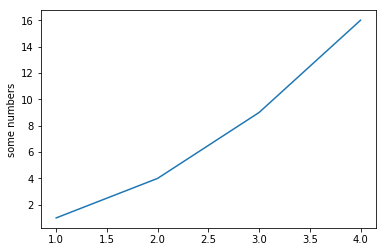

In [38]:
import matplotlib.pyplot as plt

plt.ylabel('some numbers')
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.show()

In [39]:
tsmc_sheet = wb.sheets['result']
time_series = tsmc_sheet.range('A2').options(np.array, expand='down').value
time_series

array([datetime.datetime(2017, 10, 5, 0, 0),
       datetime.datetime(2017, 10, 6, 0, 0),
       datetime.datetime(2017, 10, 11, 0, 0), '2017/10/12', '2017/10/13',
       '2017/10/16', '2017/10/17', '2017/10/18', '2017/10/19',
       '2017/10/20', '2017/10/23', '2017/10/24', '2017/10/25',
       '2017/10/26', '2017/10/27', '2017/10/30', '2017/10/31',
       '2017/11/01', '2017/11/02', '2017/11/03', '2017/11/06',
       '2017/11/07', '2017/11/08', '2017/11/09', '2017/11/10',
       '2017/11/13', '2017/11/14', '2017/11/15', '2017/11/16',
       '2017/11/17', '2017/11/20', '2017/11/21', '2017/11/22',
       '2017/11/23', '2017/11/24', '2017/11/27', '2017/11/28',
       '2017/11/29', '2017/11/30', datetime.datetime(2017, 12, 1, 0, 0),
       datetime.datetime(2017, 12, 4, 0, 0),
       datetime.datetime(2017, 12, 5, 0, 0),
       datetime.datetime(2017, 12, 6, 0, 0),
       datetime.datetime(2017, 12, 7, 0, 0),
       datetime.datetime(2017, 12, 8, 0, 0), '2017/12/09', '2017/12/10',
      

In [40]:
ma_3d = tsmc_sheet.range('B2').options(np.array, expand='down').value
ma_3d

array([224.5, 224.5, 233. , 237.5, 237.5, 238. , 235.5, 237.5, 239. ,
       237.5, 239. , 238. , 238. , 236. , 239. , 243. , 243. , 242.5,
       241. , 239. , 239.5, 244. , 242.5, 241. , 240.5, 239.5, 240. ,
       237.5, 238. , 241.5, 238.5, 243. , 242. , 242.5, 244. , 237. ,
       234. , 234.5, 226. , 231. , 234. , 232.5, 227. , 226.5, 227. ,
       231. , 231. , 227.5, 227.5, 227.5, 227.5, 227.5, 230.5, 224.5,
       225. , 225. , 227.5, 228.5, 226. , 225. , 226. , 229.5, 232.5,
       239.5, 240. , 242. , 242. , 236.5, 235. , 237. , 240. , 240.5,
       242. , 248.5, 255.5, 261.5, 266. , 258. , 258. , 255. , 258.5,
       253. , 255. , 259.5, 259.5, 253. , 239. , 240. , 238.5, 232.5,
       236.5, 242.5, 239.5, 245. , 246.5, 246. , 243. , 240. , 241.5,
       250. , 247. , 249.5, 250.5, 254. , 259. , 257. , 255. , 255. ,
       255. , 253. , 252. , 251. , 245. , 243.5, 251. , 245. , 244. ,
       246. , 247. , 246. , 244. , 245. , 245.5, 248. , 245. , 244.5,
       245. , 243.5,

Text(0,0.5,'Price')

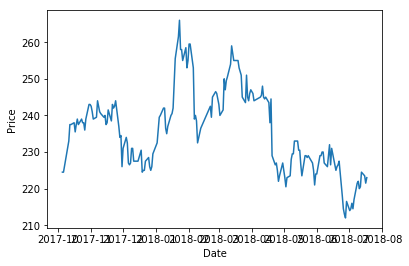

In [41]:
fig = plt.figure()
plt.plot(time_series, ma_3d)
plt.xlabel('Date')
plt.ylabel('Price')

In [42]:
result_sheet.pictures.add(fig, name="Closing Price vs Date")

<Picture 'Closing Price vs Date' in <Sheet [tsmc_back_test.xlsx]result>>

# 成功將圖加到了 Excel 上面

![](https://www.dropbox.com/s/hkr2r8r8vn98msj/matplot_first_try.PNG?dl=1)

但是圖的位置將一部分的資料蓋住了...

In [43]:
# 設定圖的左邊與上面的位置
plot = result_sheet.pictures.add(fig,name="Closing Price vs Date",
                     left=result_sheet.range('F10').left, top=result_sheet.range('F10').top)

In [44]:
# 若覺得圖太大...

plot.height /= 2
plot.width /= 2